### EDA
Author: Wen-shan, Liu
Date: May 05 2025

##### Objective


##### Main Steps
1. load dataset (Already combined all 3 basic dataset)
2. clean dataset 
3. NLP process
4. EDA
5. Modeling
    



##### 1. Load already combined dataset

 Load the csv dataset from the previous steps

In [1]:
# load data
import pandas as pd
df= pd.read_csv('clean_df.csv')
df.shape

(6650, 10)

###### 2. Clean Data set

- Remove duplicted date and  null value
- Feature Engineering
- Remove $ in the original price

In [2]:
# Check the data 
# 1. check the duplicated data

# count the duplicated quote
amount = df[df['quote'].duplicated()].count()
amount


Unnamed: 0        53
title             53
platform          53
releaseDate       53
rating            51
genres            53
quote             53
score             53
total_sales       53
original_price    53
dtype: int64

In [3]:
# df information
df.info()

# check the null value
df.isnull().sum()

# to check the null percentage
null_percentage = df.isnull().sum()/len(df)
print('The null percentage of each column is:')
print(null_percentage)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6650 entries, 0 to 6649
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      6650 non-null   int64  
 1   title           6650 non-null   object 
 2   platform        6650 non-null   object 
 3   releaseDate     6605 non-null   object 
 4   rating          6325 non-null   object 
 5   genres          6605 non-null   object 
 6   quote           6650 non-null   object 
 7   score           6583 non-null   float64
 8   total_sales     6650 non-null   float64
 9   original_price  6650 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 519.7+ KB
The null percentage of each column is:
Unnamed: 0        0.000000
title             0.000000
platform          0.000000
releaseDate       0.006767
rating            0.048872
genres            0.006767
quote             0.000000
score             0.010075
total_sales       0.000000
origina

In [4]:
# remove the null value
df = df.dropna()
df.shape


(6258, 10)

In [5]:
#remove the duplicated quote
df = df.drop_duplicates(subset=['quote'])
df.shape

# to check the duplicated quote
#df[df['quote'].duplicated()]


(6208, 10)

In [6]:
# print df
df.head(5)


,Unnamed: 0,title,platform,releaseDate,rating,genres,quote,score,total_sales,original_price
164,164,Dead Cells,Nintendo Switch,2018-08-07,T,Metroidvania,Get it if you are up for a big big challenge. ...,10.0,0.11,$34.99
165,165,Dead Cells,Nintendo Switch,2018-08-07,T,Metroidvania,Quite frankly one of the best games I have eve...,10.0,0.11,$34.99
166,166,Dead Cells,Nintendo Switch,2018-08-07,T,Metroidvania,This is by far the game I have played the most...,10.0,0.11,$34.99
167,167,Dead Cells,Nintendo Switch,2018-08-07,T,Metroidvania,Woah. Dead Cells is one hell of an excellent b...,10.0,0.11,$34.99
168,168,Dead Cells,Nintendo Switch,2018-08-07,T,Metroidvania,This is the best I've played in years. I kept ...,10.0,0.11,$34.99


In [7]:
# Feature Engerining
# 1. Use releaseDate --> Extract 'Year' , 'Month' and 'Quarter' 

# convert the date to datetime and only keep the year
df['releaseDate'] = pd.to_datetime(df['releaseDate'])
df['release_year'] = df['releaseDate'].dt.year


# convert the date to quarter
df['release_quarter'] = df['releaseDate'].dt.quarter
df.head(5)

# Cover the date to month
df['release_month'] = df['releaseDate'].dt.month
df.head(5)


,Unnamed: 0,title,platform,releaseDate,rating,genres,quote,score,total_sales,original_price,release_year,release_quarter,release_month
164,164,Dead Cells,Nintendo Switch,2018-08-07,T,Metroidvania,Get it if you are up for a big big challenge. ...,10.0,0.11,$34.99,2018,3,8
165,165,Dead Cells,Nintendo Switch,2018-08-07,T,Metroidvania,Quite frankly one of the best games I have eve...,10.0,0.11,$34.99,2018,3,8
166,166,Dead Cells,Nintendo Switch,2018-08-07,T,Metroidvania,This is by far the game I have played the most...,10.0,0.11,$34.99,2018,3,8
167,167,Dead Cells,Nintendo Switch,2018-08-07,T,Metroidvania,Woah. Dead Cells is one hell of an excellent b...,10.0,0.11,$34.99,2018,3,8
168,168,Dead Cells,Nintendo Switch,2018-08-07,T,Metroidvania,This is the best I've played in years. I kept ...,10.0,0.11,$34.99,2018,3,8


In [8]:
# to remove $ in the original price
df['original_price'] = df['original_price'].str.replace('$', '')
df['original_price'] = df['original_price'].astype(float)
df.head(5)


,Unnamed: 0,title,platform,releaseDate,rating,genres,quote,score,total_sales,original_price,release_year,release_quarter,release_month
164,164,Dead Cells,Nintendo Switch,2018-08-07,T,Metroidvania,Get it if you are up for a big big challenge. ...,10.0,0.11,34.99,2018,3,8
165,165,Dead Cells,Nintendo Switch,2018-08-07,T,Metroidvania,Quite frankly one of the best games I have eve...,10.0,0.11,34.99,2018,3,8
166,166,Dead Cells,Nintendo Switch,2018-08-07,T,Metroidvania,This is by far the game I have played the most...,10.0,0.11,34.99,2018,3,8
167,167,Dead Cells,Nintendo Switch,2018-08-07,T,Metroidvania,Woah. Dead Cells is one hell of an excellent b...,10.0,0.11,34.99,2018,3,8
168,168,Dead Cells,Nintendo Switch,2018-08-07,T,Metroidvania,This is the best I've played in years. I kept ...,10.0,0.11,34.99,2018,3,8


In [9]:
"""
# to create a new df which only for games's information, total_sales,  original_price, without quote
df_games = df.drop(['quote'], axis=1)
df_games.head(5)

"""


"\n# to create a new df which only for games's information, total_sales,  original_price, without quote\ndf_games = df.drop(['quote'], axis=1)\ndf_games.head(5)\n\n"

In [10]:
"""
# df_games:remove the duplicated title
df_games = df_games.drop_duplicates(subset=['title'])

df_games.info()
"""

"\n# df_games:remove the duplicated title\ndf_games = df_games.drop_duplicates(subset=['title'])\n\ndf_games.info()\n"

##### 3. NLP Process


- Deal with the 'quote' column.  To performs natural language processing (NLP) on game review text data using NLTK and spaCy. The pipeline includes tokenization, stopword removal, stemming (via PorterStemmer), and lemmatization (via WordNetLemmatizer). It also extracts named entities using spaCy’s NER and computes word frequency statistics. The cleaned tokens—both stemmed and lemmatized—are then stored in new DataFrame columns for further analysis or modeling. 


NLP: stemming, lemmatization, tokenization, stop word removal, frequency analysis.

In [11]:
df.head(5)

,Unnamed: 0,title,platform,releaseDate,rating,genres,quote,score,total_sales,original_price,release_year,release_quarter,release_month
164,164,Dead Cells,Nintendo Switch,2018-08-07,T,Metroidvania,Get it if you are up for a big big challenge. ...,10.0,0.11,34.99,2018,3,8
165,165,Dead Cells,Nintendo Switch,2018-08-07,T,Metroidvania,Quite frankly one of the best games I have eve...,10.0,0.11,34.99,2018,3,8
166,166,Dead Cells,Nintendo Switch,2018-08-07,T,Metroidvania,This is by far the game I have played the most...,10.0,0.11,34.99,2018,3,8
167,167,Dead Cells,Nintendo Switch,2018-08-07,T,Metroidvania,Woah. Dead Cells is one hell of an excellent b...,10.0,0.11,34.99,2018,3,8
168,168,Dead Cells,Nintendo Switch,2018-08-07,T,Metroidvania,This is the best I've played in years. I kept ...,10.0,0.11,34.99,2018,3,8


In [12]:

# NLP tokenization Process

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from nltk.tree import Tree
from sklearn.feature_extraction.text import TfidfVectorizer


import nltk

# Downlad nltk Natural Language Toolkit
nltk.download('maxent_ne_chunker') # to detect Name, Location, Orgazation
nltk.download('words')  # Englishh word list
nltk.download('punkt') # tokenization
nltk.download('averaged_perceptron_tagger') # POS tagging
nltk.download('stopwords') # stop word list
nltk.download('wordnet') # lemmatization

# Check Spacy model already been download
import spacy
try:
    nlp = spacy.load('en_core_web_sm')
except OSError:
    print("Downloading spaCy model...")
    !python -m spacy download en_core_web_sm
    nlp = spacy.load('en_core_web_sm')

def preprocess_text(text):
    """
    This function is to preprocess the text data.
    """
    # 1. Tokenization（分词）
    tokens = word_tokenize(text.lower())
    
    # 2. Stop Words Removal（去除停用词）
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words and token.isalnum()]
    
    # 3. Stemming（词干提取）
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    
    # 4. Lemmatization（词形还原）
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # 5. NER (Named Entity Recognition)
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    
    # 6. Frequency Analysis（词频分析）
    frequency = Counter(tokens)
    
    return {
        'original_tokens': tokens,
        'stemmed_tokens': stemmed_tokens,
        'lemmatized_tokens': lemmatized_tokens,
        'entities': entities,
        'frequency': frequency
    }

# Apply the preprocess_text function to the 'quote' column
df['processed_tokens'] = df['quote'].apply(preprocess_text)

# Add the cleaned text to the new column
df['clean_text_stemmed'] = df['processed_tokens'].apply(lambda x: ' '.join(x['stemmed_tokens']))
df['clean_text_lemmatized'] = df['processed_tokens'].apply(lambda x: ' '.join(x['lemmatized_tokens']))

# Print data
print("\nExample of the first 5 rows:")
print(df[['quote', 'processed_tokens']].head(5))


[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/sandyliu/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /Users/sandyliu/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to /Users/sandyliu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/sandyliu/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sandyliu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sandyliu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/Users/sandyliu/anaconda3/envs/Springboard/lib/python3.8/site-packages/torch/__init__.py:955: UserWarning: torch.


Example of the first 5 rows:
                                                 quote  \
164  Get it if you are up for a big big challenge. ...   
165  Quite frankly one of the best games I have eve...   
166  This is by far the game I have played the most...   
167  Woah. Dead Cells is one hell of an excellent b...   
168  This is the best I've played in years. I kept ...   

                                      processed_tokens  
164  {'original_tokens': ['get', 'big', 'big', 'cha...  
165  {'original_tokens': ['quite', 'frankly', 'one'...  
166  {'original_tokens': ['far', 'game', 'played', ...  
167  {'original_tokens': ['woah', 'dead', 'cells', ...  
168  {'original_tokens': ['best', 'played', 'years'...  


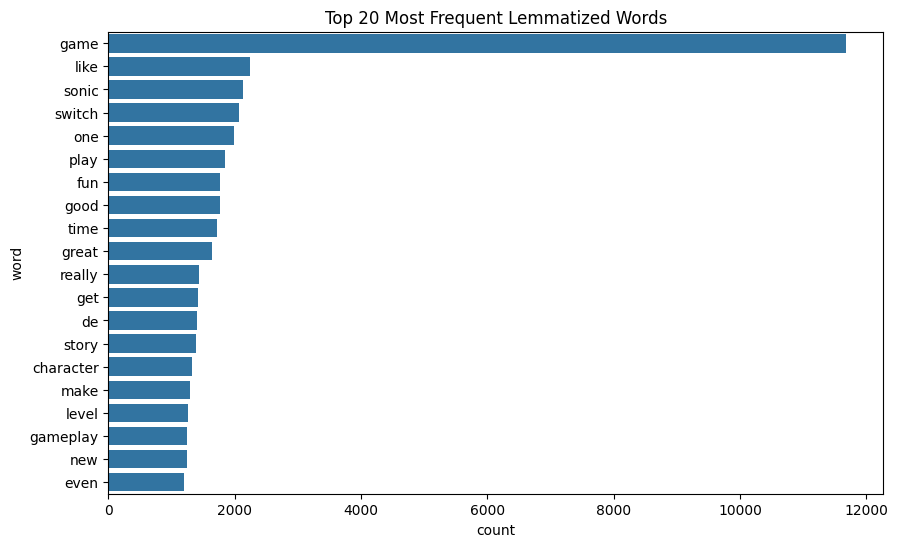

In [13]:
# To analyze and visualize the top 20 most frequent lemmatized words

from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

# Merge all frequency results
all_tokens = df['processed_tokens'].apply(lambda x: x['lemmatized_tokens'])
flat_list = [token for sublist in all_tokens for token in sublist]
word_freq = Counter(flat_list).most_common(20)

# Visualtation
freq_df = pd.DataFrame(word_freq, columns=['word', 'count'])
plt.figure(figsize=(10,6))
sns.barplot(x='count', y='word', data=freq_df)
plt.title("Top 20 Most Frequent Lemmatized Words")
plt.show()

In [14]:
# To convert the cleaned review text into numerical features using TF-IDF (Term Frequency-Inverse Document Frequency) 
# and find the top 10 most informative terms across the corpus.

# 对整个语料库进行TF-IDF处理
# 首先将所有lemmatized_tokens合并为文本，但只保留名词、动词、形容词等重要词性
df['clean_text_lemmatized'] = df['processed_tokens'].apply(
    lambda x: ' '.join([token for token in x['lemmatized_tokens'] 
                       if len(token) > 2])  # 过滤掉太短的词
)

# 创建改进的TF-IDF向量化器
vectorizer = TfidfVectorizer(
    max_features=50,    # 减少特征数量，更集中
    min_df=0.05,       # 提高最小文档频率阈值
    max_df=0.75,        # 降低最大文档频率阈值
    stop_words='english',
    ngram_range=(1, 2),
    norm='l1',         # 使用L1归一化
    use_idf=True,
    smooth_idf=False   # 不使用平滑处理
)

# 拟合和转换
tfidf_matrix = vectorizer.fit_transform(df['clean_text_lemmatized'])

# 获取特征名称和TF-IDF分数
feature_names = vectorizer.get_feature_names_out()
tfidf_scores = pd.DataFrame(
    tfidf_matrix.toarray(),
    columns=feature_names
)

# 计算每个特征的平均TF-IDF分数并乘以100以便更好地展示
avg_tfidf = tfidf_scores.mean() * 100
top_features = avg_tfidf.sort_values(ascending=False).head(10)

print("\n最重要的10个特征及其平均TF-IDF分数（百分比）：")
print(top_features)



最重要的10个特征及其平均TF-IDF分数（百分比）：
game        10.971022
switch       4.077096
fun          3.132671
good         2.872452
great        2.852793
play         2.699848
like         2.647660
sonic        2.621782
time         2.520333
gameplay     2.426738
dtype: float64


In [15]:
tfidf_scores

,bad,best,better,bit,character,classic,collection,content,control,design,...,story,switch,thing,time,title,version,want,warrior,way,world
0,0.0,0.000000,0.000000,0.119875,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.225617,0.175017,0.0,0.00000,0.000000,0.0,0.00000,0.000000
1,0.0,0.092915,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.00000,0.000000
2,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.186974,0.000000,0.0,0.00000,0.000000,0.0,0.08612,0.000000
3,0.0,0.011722,0.000000,0.000000,0.012243,0.000000,0.0,0.0,0.000000,0.0,...,0.022806,0.019162,0.041178,0.074533,0.0,0.01333,0.028378,0.0,0.00000,0.000000
4,0.0,0.074975,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.072936,0.000000,0.000000,0.068104,0.0,0.00000,0.000000,0.0,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6203,0.0,0.000000,0.404863,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.595137,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.00000,0.000000
6204,0.0,0.000000,0.000000,0.000000,0.000000,0.509672,0.0,0.0,0.490328,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.00000,0.000000
6205,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.00000,0.000000
6206,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.106190,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.00000,0.312932


In [16]:
# To Use TF-IDF to train model (VADER +  TF-IDF + Classication ML), which could help SentimentIntensityAnalyzer

from nltk.sentiment import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
df['sentiment'] = df['clean_text_lemmatized'].apply(lambda x: 'positive' if sid.polarity_scores(x)['compound'] >= 0.05 
                                    else 'negative' if sid.polarity_scores(x)['compound'] <= -0.05 
                                    else 'neutral')


X = tfidf_scores  # TFidf socre
y = df['sentiment']  # "Assign the sentiment column from the DataFrame df to the variable y, which will serve as the target labels for classification. 
                     #These labels represent the sentiment categories: 'positive', 'neutral', or 'negative'."


# Train Classication ML
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Spilt Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Evaluation Model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    negative       0.59      0.12      0.20       180
     neutral       0.55      0.66      0.60        83
    positive       0.85      0.96      0.90       979

    accuracy                           0.82      1242
   macro avg       0.67      0.58      0.57      1242
weighted avg       0.79      0.82      0.78      1242



In [17]:
# Append the new coulmn 'predicted_sentiment' from SentimentIntensityAnalyzer  to the original df

# 對所有資料做預測（用整體 TF-IDF）
# 重新建立完整資料集（假設沒打亂）
X_all = pd.concat([X_train, X_test], axis=0)
y_all = pd.concat([y_train, y_test], axis=0)

# 確保順序對應
df = df.iloc[X_all.index]

# 加入預測欄位
df['predicted_sentiment'] = clf.predict(X_all)


In [18]:
df.head()

,Unnamed: 0,title,platform,releaseDate,rating,genres,quote,score,total_sales,original_price,release_year,release_quarter,release_month,processed_tokens,clean_text_stemmed,clean_text_lemmatized,sentiment,predicted_sentiment
896,979,Wolfenstein II: The New Colossus,Nintendo Switch,2017-10-27,M,FPS,A fantastic FPS that has fantastic graphics an...,9.0,0.11,39.99,2017,4,10,"{'original_tokens': ['fantastic', 'fps', 'fant...",fantast fp fantast graphic play fast smooth re...,fantastic fps fantastic graphic play fast smoo...,positive,positive
937,1020,Wolfenstein II: The New Colossus,Nintendo Switch,2017-10-27,M,FPS,"If you played this game on another console, th...",88.0,0.11,39.99,2017,4,10,"{'original_tokens': ['played', 'game', 'anothe...",play game anoth consol probabl real reason rev...,played game another console probably real reas...,positive,positive
455,455,SteamWorld Dig 2,Nintendo Switch,2017-09-21,E10+,Metroidvania,It's pretty alright. One of the plot points di...,7.0,0.01,6.99,2017,3,9,"{'original_tokens': ['pretty', 'alright', 'one...",pretti alright one plot point realli get resol...,pretty alright one plot point really get resol...,positive,positive
3546,4449,Little Nightmares: Complete Edition,Nintendo Switch,2018-05-18,T,Linear Action Adventure,Ein wirklich sehr atmosphärisches Horrorgame m...,9.0,0.05,29.99,2018,2,5,"{'original_tokens': ['ein', 'wirklich', 'sehr'...",ein wirklich sehr atmosphärisch horrorgam mit ...,ein wirklich sehr atmosphärisches horrorgame m...,negative,negative
476,476,Diablo III: Eternal Collection,Nintendo Switch,2018-11-02,M,Action RPG,Well for me its the BEST action rpg playable a...,10.0,0.67,59.99,2018,4,11,"{'original_tokens': ['well', 'best', 'action',...",well best action rpg playabl long period time ...,well best action rpg playable long period time...,positive,positive


In [19]:
# to adjust the sentiment_map column
sentiment_map = {'negative': -1, 'neutral': 0, 'positive': 1}
df['sentiment_score'] = df['sentiment'].map(sentiment_map)

In [20]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6208 entries, 896 to 3117
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             6208 non-null   int64         
 1   title                  6208 non-null   object        
 2   platform               6208 non-null   object        
 3   releaseDate            6208 non-null   datetime64[ns]
 4   rating                 6208 non-null   object        
 5   genres                 6208 non-null   object        
 6   quote                  6208 non-null   object        
 7   score                  6208 non-null   float64       
 8   total_sales            6208 non-null   float64       
 9   original_price         6208 non-null   float64       
 10  release_year           6208 non-null   int32         
 11  release_quarter        6208 non-null   int32         
 12  release_month          6208 non-null   int32         
 13  proces

In [21]:
# 匯出 到之後的 ML 階段
df.to_csv('df_with_sentiment.csv', index=False)

r

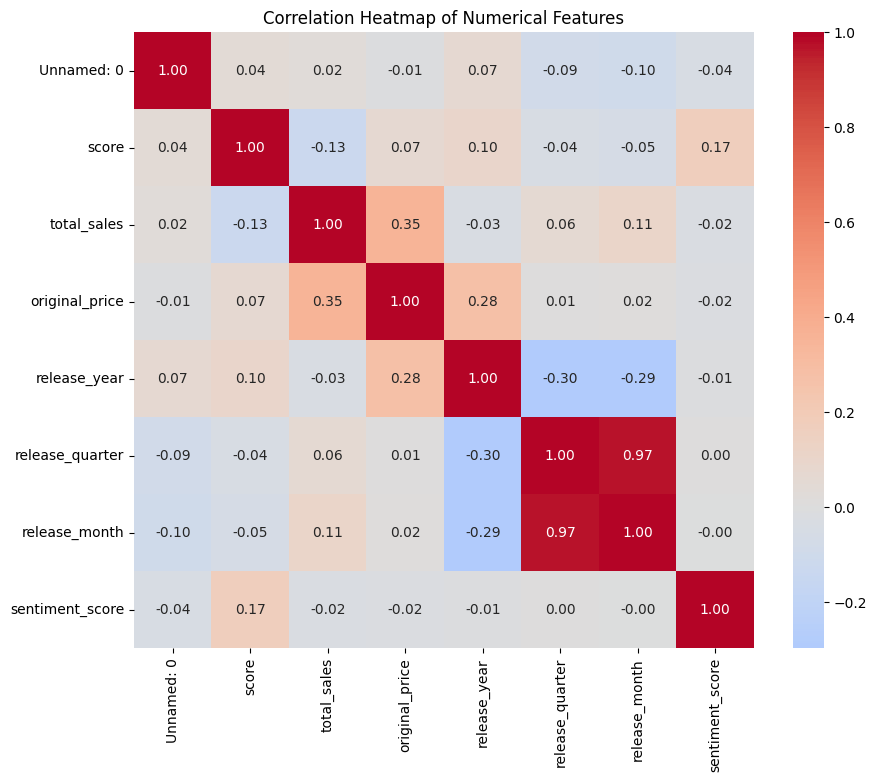


Numerical columns include:
['Unnamed: 0', 'score', 'total_sales', 'original_price', 'release_year', 'release_quarter', 'release_month', 'sentiment_score']


In [26]:
### NLP finish ### Data Visuation after NLP
# heatmap 觀察各個變數間的相關性

# 导入必要的库
import matplotlib.pyplot as plt
import seaborn as sns

# 选择数值型列
numeric_columns = df.select_dtypes(include=['float64', 'int64', 'int32']).columns
correlation_matrix = df[numeric_columns].corr()

# 绘制热力图
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, 
            annot=True,  # 显示相关系数
            cmap='coolwarm',  # 使用蓝红配色
            center=0,  # 将相关系数0设为白色
            fmt='.2f')  # 保留两位小数

plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# 打印数值列的名称
print("\nNumerical columns include:")
print(numeric_columns.tolist())

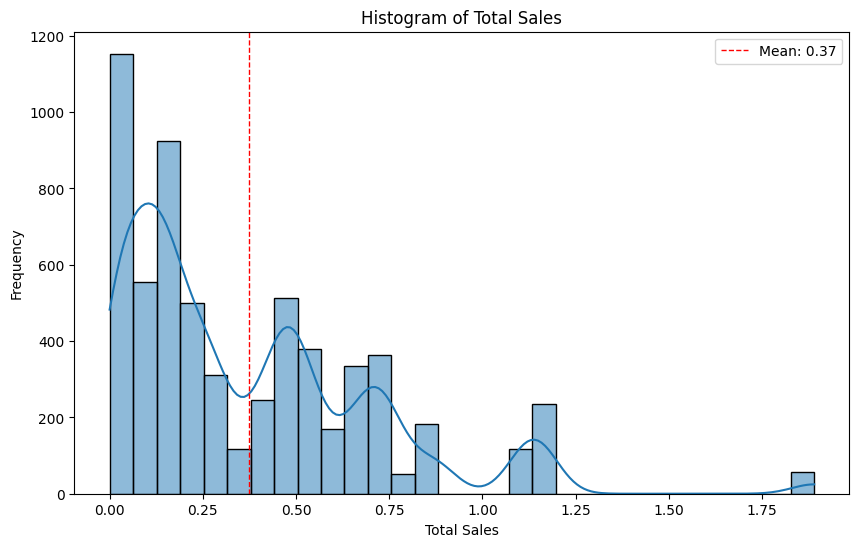

In [37]:

# 直條圖 總銷售量 
# 觀察 right skewed 的現象

# to make Histograms of the sales and original_price


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['total_sales'], bins=30, kde=True, edgecolor='black')

# 加平均線
mean_val = df['total_sales'].mean()
plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_val:.2f}')

plt.title('Histogram of Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Frequency')
plt.legend()

plt.show()

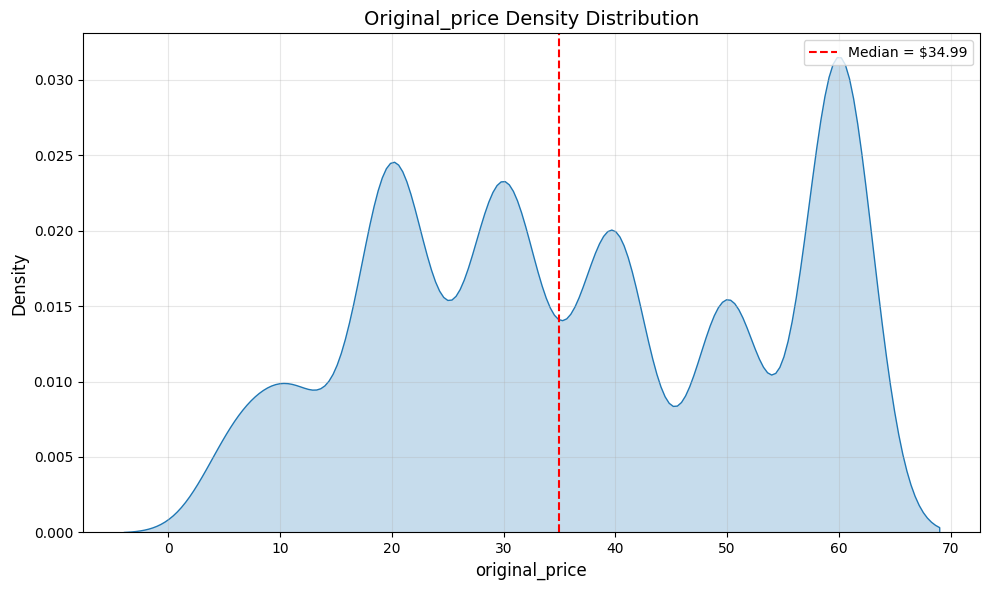

In [38]:
# scatter plot 觀察 origigal price 分布
# 觀察 right skewed 的現象

# 創建密度圖
import matplotlib.pyplot as plt
import seaborn as sns

# 創建圖表
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='original_price', fill=True)

# 添加標題和標籤
plt.title('Original_price Density Distribution', fontsize=14)
plt.xlabel('original_price', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.axvline(df['original_price'].median(), color='red', linestyle='--', label='Median = $' + str(df['original_price'].median()))

# 添加網格線
plt.grid(True, alpha=0.3)

# Add Legend
plt.legend()

# 顯示圖表
plt.tight_layout()
plt.show()



In [55]:
# Violin plot : Game Type vs total_sales

# Extract small dataset (Which contain title, genres, total_sales)
df_small = (
    df[['title', 'genres', 'total_sales', 'original_price', 'release_year', 'release_month']]
    .groupby('title', as_index=False)
    .agg({
        'genres': 'first',  
        'total_sales': 'mean',
        'original_price': 'mean',
        'release_year': 'first',
        'release_month': 'first'
    })
)
df_small.head(5)


,title,genres,total_sales,original_price,release_year,release_month
0,88 Heroes: 98 Heroes Edition,2D Platformer,0.02,59.99,2017,10
1,ARK: Survival Evolved,Sandbox,0.08,14.99,2017,8
2,Adventure Time: Pirates of the Enchiridion,JRPG,0.03,24.99,2018,7
3,All-Star Fruit Racing,Auto Racing,0.01,9.99,2018,8
4,Atelier Lydie & Suelle: The Alchemists and the...,JRPG,0.03,39.99,2018,3


/var/folders/ym/cnwhpvr13b10x0g3j5y5kn9w0000gn/T/ipykernel_20952/2120735069.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_df,x ='genres', y='total_sales', palette='Set3')


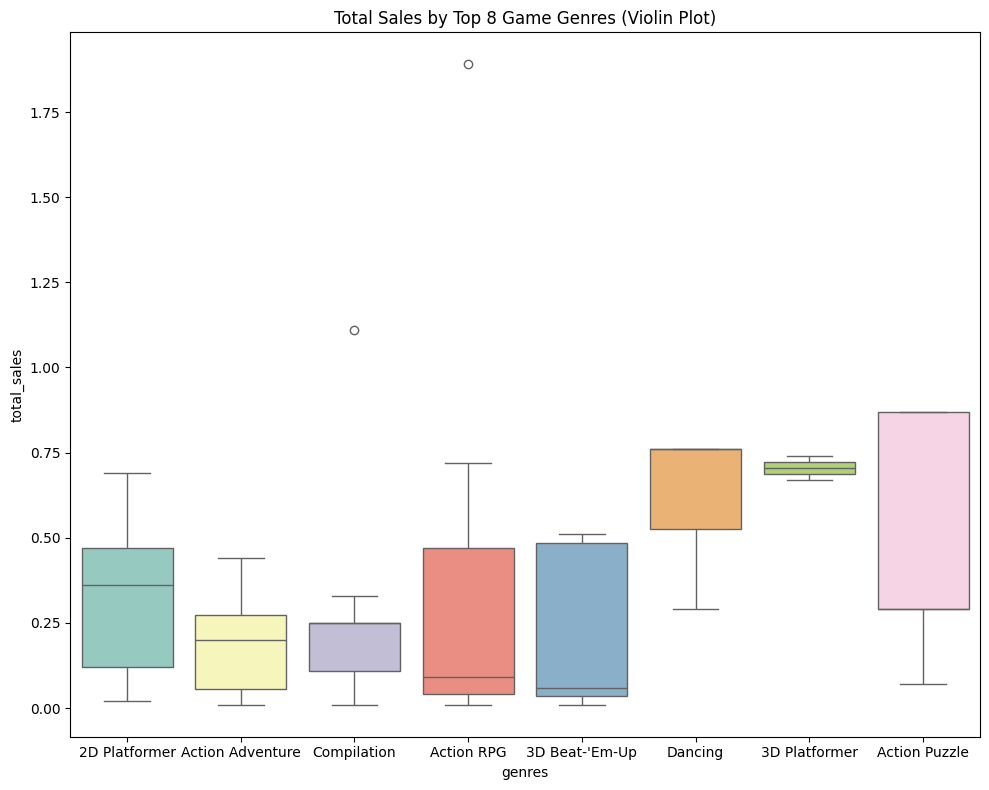

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))

# the top8 sales amount
top_genres = (
    df_small.groupby('genres')['total_sales']
    .sum()
    .nlargest(8)
    .index
)
# filter the top8 sales amount
filtered_df = df_small[df_small['genres'].isin(top_genres)]

sns.boxplot(data=filtered_df,x ='genres', y='total_sales', palette='Set3')
plt.title('Total Sales by Top 8 Game Genres (Violin Plot)')
plt.tight_layout()
plt.show()

<Figure size 1000x800 with 0 Axes>

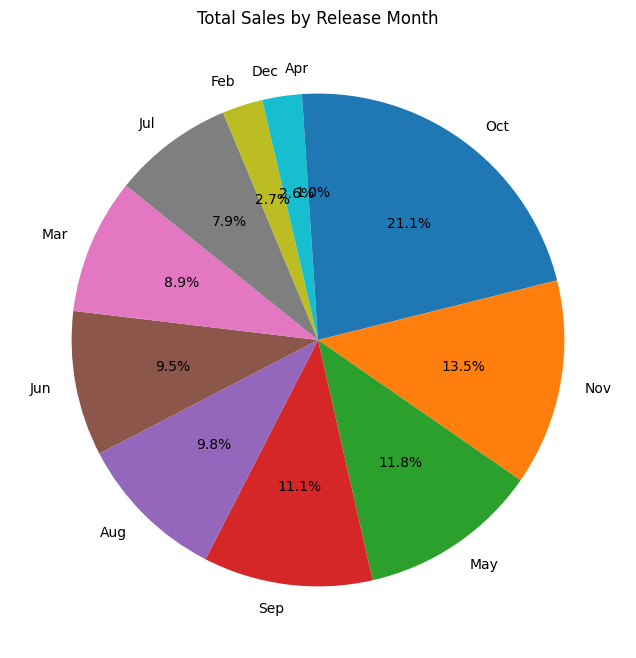

In [73]:
# pie chat for relase_month 

month_df = df_small[['release_month', 'total_sales']]

plt.figure(figsize=(10, 8))

# 計算每個月份的銷售量總和
monthly_sales = month_df.groupby('release_month')['total_sales'].sum()

month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_sales.index = [month_labels[i - 1] for i in monthly_sales.index]

monthly_sales = monthly_sales.sort_values(ascending=False)

# 繪製圓餅圖
plt.figure(figsize=(10, 8))
plt.pie(monthly_sales, labels=monthly_sales.index, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title('Total Sales by Release Month')
plt.show()


**Games Released in October Tend to Sell Well -- Market Trend Analysis**

- 1. Preparing for the Year-End Holiday Season (Q4) <br>
In major markets like the U.S. and Europe, consumer spending spikes around Thanksgiving, Black Friday, and Christmas.</br>
Releasing games in October allows time to build up word-of-mouth and momentum before the big holiday shopping rush in November and December.  <br>

- 2. Students Have More Free Time After Returning to School  <br>
After the fall semester begins, many students settle into a routine and have more stable leisure time, making October a peak period for entertainment spending.